In [1]:
import GLFinancial as glf

import matplotlib.pyplot as plt
import numpy as np

Pretax Income ranging from 0 to 340000


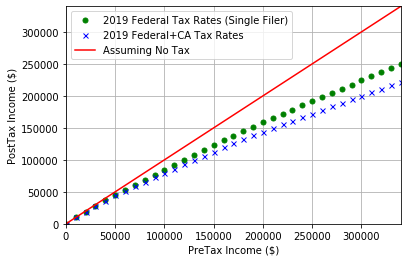

In [2]:

pretax_income = np.arange(0, 350 * 1000, 10 * 1000)
posttax_income = glf.posttax(pretax_income)

print('Pretax Income ranging from {} to {}'.format(pretax_income[0], pretax_income[-1]))

fig, ax = plt.subplots()
plt.plot(pretax_income, glf.posttax(pretax_income, state_tax=[]), 'og', ms=5, label='2019 Federal Tax Rates (Single Filer)')
plt.plot(pretax_income, glf.posttax(pretax_income, state_tax=glf.ca_tax_rates), 'xb', ms=5, label='2019 Federal+CA Tax Rates')
plt.plot(pretax_income, pretax_income, '-r', ms=4, label='Assuming No Tax')
plt.axis([0,pretax_income[-1],0,pretax_income[-1]])
ax.legend()
ax.set_xlabel('PreTax Income ($)')
ax.set_ylabel('PostTax Income ($)')
plt.grid()

plt.show()


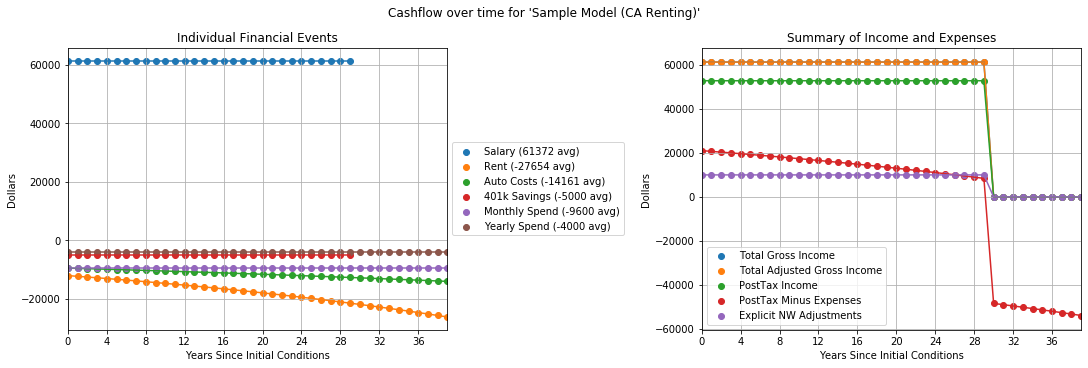

Starting to simulate Sample Model (CA Renting) over 175 runs for 40 years each...]
	Finished simulating Sample Model (CA Renting) in 0.8 seconds...
	Finished summarizing Sample Model (CA Renting) in 1.4 seconds


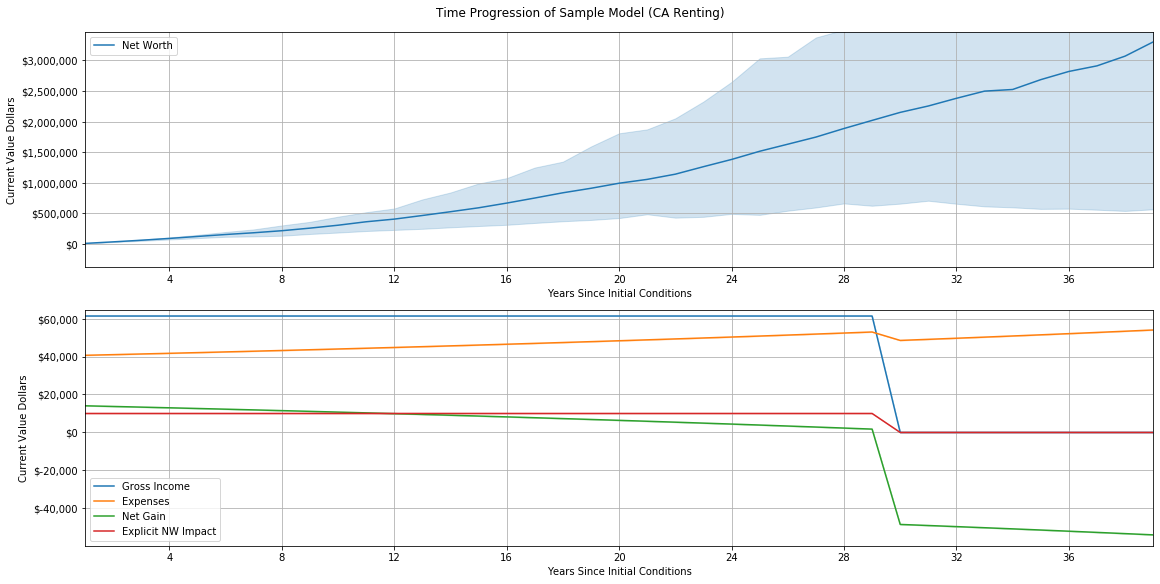

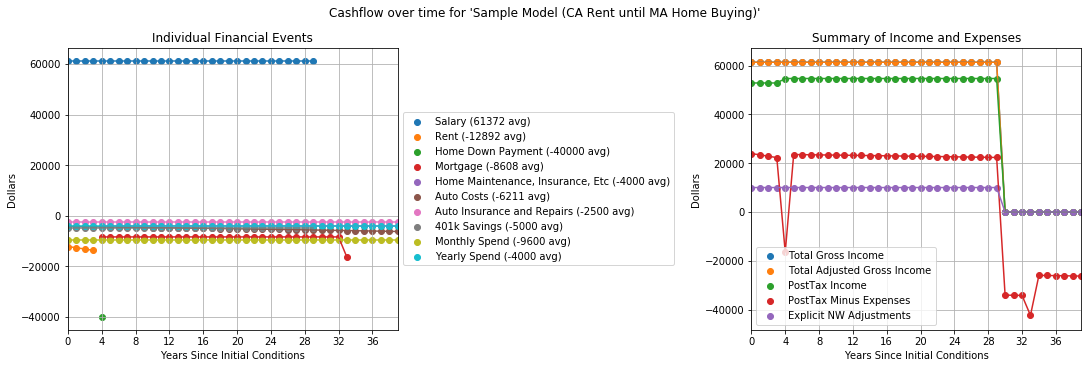

Starting to simulate Sample Model (CA Rent until MA Home Buying) over 175 runs for 40 years each...]
	Finished simulating Sample Model (CA Rent until MA Home Buying) in 0.9 seconds...
	Finished summarizing Sample Model (CA Rent until MA Home Buying) in 1.5 seconds


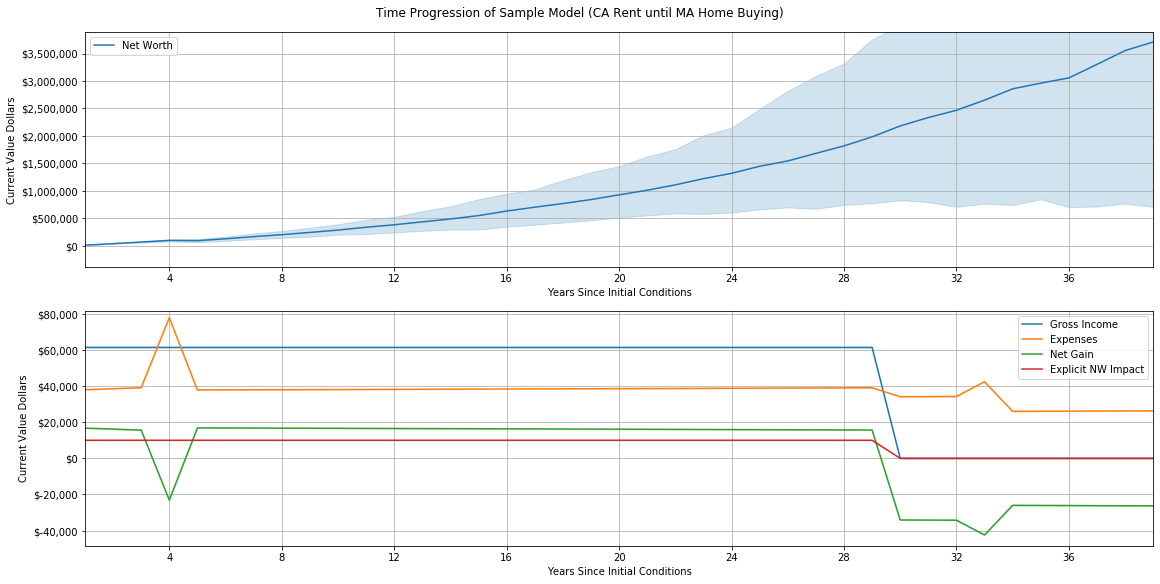

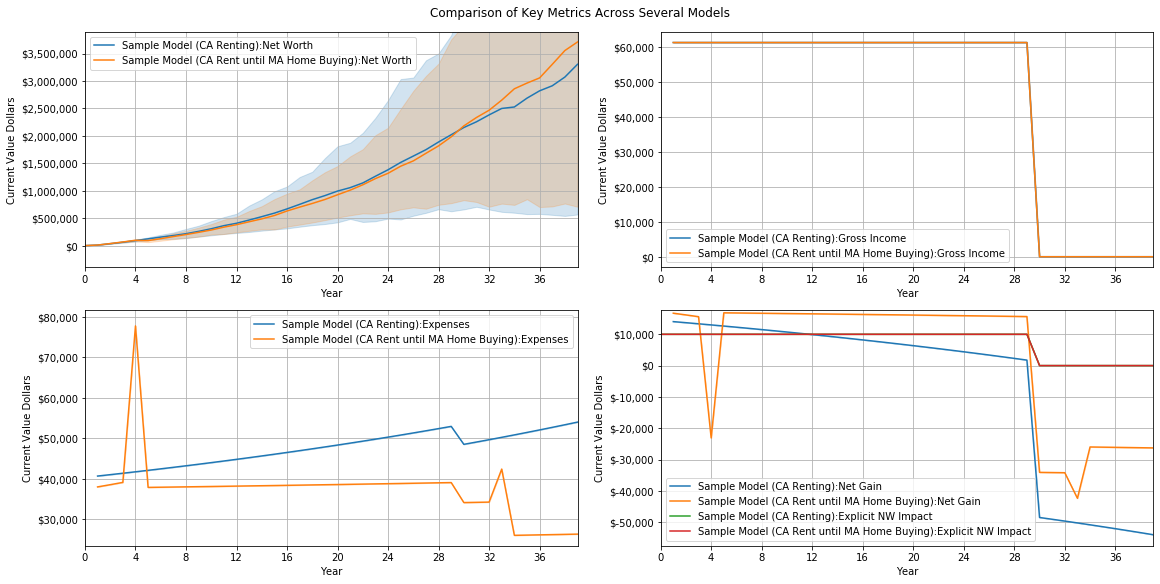

In [5]:
def get_sample_ca_fm():
    fm = glf.FinancialModel('Sample Model (CA Renting)', location='CA')
    fm.add_yearly(61372, 'Salary', year_end=30, agi_impacting=True)
    fm.add_monthly(-1012, 'Rent', apr=1.02) # Average rent increase is 4-5% per year, reduced by inflation of ~2% because we do all math in current value dollars
    # https://www.deptofnumbers.com/rent/us/ https://magazine.realtor/commercial/feature/article/2016/02/delicate-art-rent-increases
    fm.add_yearly(-9576, 'Auto Costs', apr=1.01) # https://www.investopedia.com/articles/pf/08/cost-car-ownership.asp
    fm.add_yearly(-5000, '401k Savings', yearly_nw_amount=5000 * 2, year_end=30, agi_impacting=True) # We assume a generous company match
    fm.add_monthly(-800, 'Monthly Spend') # ~$200 per week
    fm.add_yearly(-4000, 'Yearly Spend') # Vacations, medical bills, and other unexpected/intermittent costs
    return fm

def get_sample_owning_fm():
    fm = glf.FinancialModel('Sample Model (CA Rent until MA Home Buying)', location='CA')
    fm.add_yearly(61372, 'Salary', year_end=30, agi_impacting=True)
    # We buy a home in this model
    home_price = 200 * 1000 # We assume a 20% down payment
    home_purchase_year = 4
    fm.add_monthly(-1012, 'Rent', apr=1.04, year_end=home_purchase_year) # Rent until you buy a house
    fm.move_to('MA', year_start=home_purchase_year)
    fm.add_single(-0.2 * home_price , 'Home Down Payment', year=home_purchase_year)
    fm.add_loan(0.8 * home_price, 'Mortgage', duration=30, year_start=home_purchase_year, apr=1.03) # 5% APR, 2% inflation
    fm.add_yearly(-0.02 * home_price, 'Home Maintenance, Insurance, Etc', year_start=home_purchase_year)
    # OPTIONAL: Some people include their home value in their net worth, and thus appreciation/etc. Since I don't plan to sell, I don't count it.
    # fm.add_single(home_price, 'Home Value', year_start=home_price)

    fm.add_monthly(-350, 'Auto Costs', apr=1.01) # A car payment, gas, etc
    fm.add_yearly(-2500, 'Auto Insurance and Repairs')
    fm.add_yearly(-5000, '401k Savings', yearly_nw_amount=5000 * 2, year_end=30, agi_impacting=True) # We assume a generous company match
    fm.add_monthly(-800, 'Monthly Spend') # ~$200 per week
    fm.add_yearly(-4000, 'Yearly Spend') # Vacations, medical bills, and other unexpected/intermittent costs
    return fm

models = [get_sample_ca_fm(), get_sample_owning_fm()]
results = []
# These sims use the default args based on real stock market data over time for rate of return and variance on it
for fm in models:
        fm.plot_cashflow(year_end=40, block=False)
        fm_mt = fm.simmany(nruns=175, nyears=40)
        fm.plot(fm_mt, block=False)
        results.append(fm_mt)
glf.FinancialModel.plotmany(results, nyears=40, block=True)
